In [30]:
import sys
import os
import glob

SRC_PATH = os.path.abspath("..") 

sys.path.insert(0, SRC_PATH)

print("SRC_PATH:", SRC_PATH)

INSTANCE_DIR = "../../instances/Set A/examples/"
instance_paths = sorted(glob.glob(INSTANCE_DIR + "*.vrp"))

SRC_PATH: /home/mateja-stankovic/Desktop/RI/projekat/RI_Large-Neighborhood-Search/src


In [59]:
import tsplib95
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cvrp.cvrp_problem import CVRPProblem
from utils.parser import parse_cvrp_problem

from destroy.random_destroy import RandomDestroy
from destroy.worst_destroy import WorstDestroy
from destroy.related_destroy import RelatedDestroy
from destroy.worst_route_destroy import WorstRouteDestroy

from repair.greedy_repair import GreedyRepair
from repair.regret_repair import RegretRepair

from accept.simulated_annealing_accept import SimulatedAnnealingAccept
from enums import LNSMethod


In [32]:
import os
import re

def load_optimal_cost(instance_filename):
  
    base = os.path.splitext(instance_filename)[0]   
    sol_path = f"../../instances/Set A/solutions/{base}.sol"

    if not os.path.exists(sol_path):
        return None

    with open(sol_path, "r") as f:
        for line in f:
            match = re.search(r"(\d+)", line)
            if "cost" in line.lower() and match:
                return int(match.group(1))

    return None


In [25]:
def run_experiment(
    instance_path,
    algorithm=LNSMethod.BASIC,
    max_iterations=3000
):
    problem_tsplib = tsplib95.load(instance_path)
    parsed = parse_cvrp_problem(problem_tsplib)

    problem = CVRPProblem(
        parsed.nodes,
        parsed.demands,
        parsed.capacity,
        parsed.depot,
        filename=os.path.basename(instance_path)
    )

    start = time.time()
    best, history = problem.solve(
        algorithm=algorithm,
        accept=SimulatedAnnealingAccept(),
        destroy_methods=[
            RandomDestroy(),
            WorstDestroy(),
            RelatedDestroy(),
            WorstRouteDestroy()
        ],
        repair_methods=[
            GreedyRepair(),
            RegretRepair()
        ],
        max_iterations=max_iterations,
        return_history=True
    )
    elapsed = time.time() - start

    optimal = load_optimal_cost(problem.filename)

    gap = None
    if optimal is not None:
        gap = 100 * (best.cost - optimal) / optimal

    return {
        "instance": problem.filename,
        "algorithm": algorithm.name,
        "final_cost": best.cost,
        "optimal_cost": optimal,
        "gap_percent": gap,
        "time_sec": elapsed,
        "history": history
    }



In [33]:
results = []

for path in instance_paths:
    print("Running:", os.path.basename(path))

    # BASIC
    res_basic = run_experiment(
        path,
        algorithm=LNSMethod.BASIC,
        max_iterations=3000
    )

    # ADAPTIVE
    res_adaptive = run_experiment(
        path,
        algorithm=LNSMethod.ADAPTIVE,
        max_iterations=3000
    )

    results.append(res_basic)
    results.append(res_adaptive)



Running: A-n32-k5.vrp
Running: A-n33-k5.vrp
Running: A-n33-k6.vrp
Running: A-n34-k5.vrp
Running: A-n36-k5.vrp
Running: A-n37-k5.vrp
Running: A-n37-k6.vrp
Running: A-n38-k5.vrp
Running: A-n39-k5.vrp
Running: A-n39-k6.vrp
Running: A-n44-k6.vrp
Running: A-n45-k6.vrp
Running: A-n45-k7.vrp
Running: A-n46-k7.vrp
Running: A-n48-k7.vrp
Running: A-n53-k7.vrp
Running: A-n54-k7.vrp
Running: A-n55-k9.vrp
Running: A-n60-k9.vrp
Running: A-n61-k9.vrp
Running: A-n62-k8.vrp
Running: A-n63-k10.vrp
Running: A-n63-k9.vrp
Running: A-n64-k9.vrp
Running: A-n65-k9.vrp
Running: A-n69-k9.vrp
Running: A-n80-k10.vrp


In [34]:
df = pd.DataFrame(results)

df_times = df[[
    "instance",
    "algorithm",
    "time_sec"
]]

df_times


,instance,algorithm,time_sec
0,A-n32-k5.vrp,BASIC,0.230163
1,A-n32-k5.vrp,ADAPTIVE,0.355065
2,A-n33-k5.vrp,BASIC,0.230197
3,A-n33-k5.vrp,ADAPTIVE,0.354421
4,A-n33-k6.vrp,BASIC,0.220182
5,A-n33-k6.vrp,ADAPTIVE,0.359972
6,A-n34-k5.vrp,BASIC,0.247365
7,A-n34-k5.vrp,ADAPTIVE,0.387816
8,A-n36-k5.vrp,BASIC,0.237748
9,A-n36-k5.vrp,ADAPTIVE,0.438763


In [38]:
def extract_n_nodes(name):
    match = re.search(r"n(\d+)", name)
    return int(match.group(1)) if match else 0

df_times["n_nodes"] = df_times["instance"].apply(extract_n_nodes)
df_times = df_times.sort_values("n_nodes")


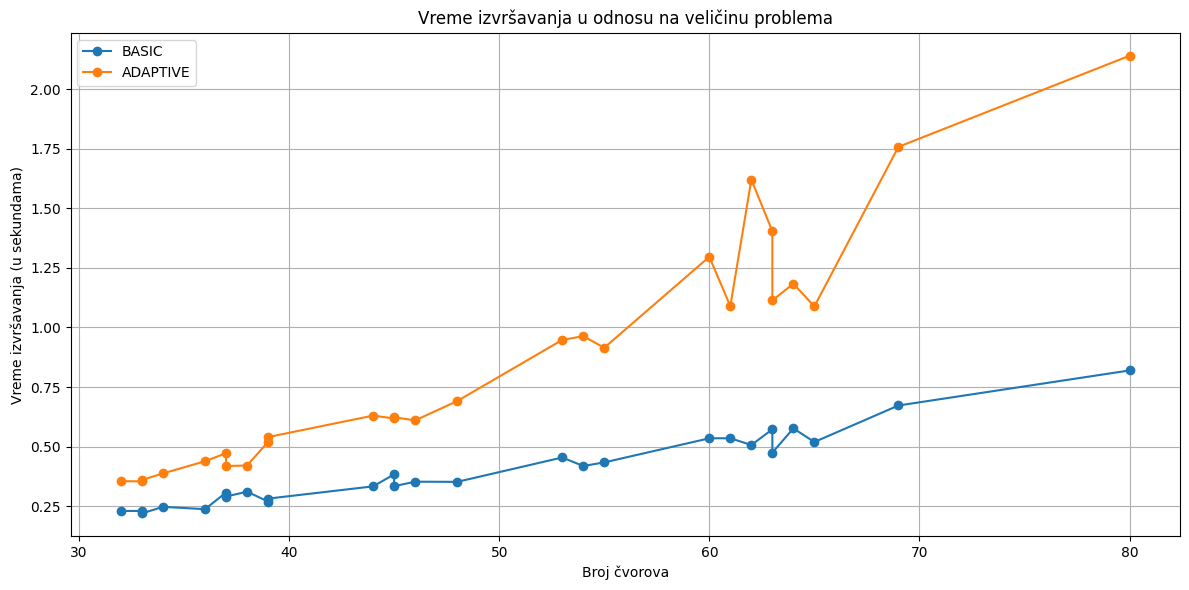

In [44]:
plt.figure(figsize=(12, 6))

for algo in df_times["algorithm"].unique():
    subset = df_times[df_times["algorithm"] == algo]
    plt.plot(
        subset["n_nodes"],
        subset["time_sec"],
        marker="o",
        label=algo
    )

plt.xlabel("Broj čvorova")
plt.ylabel("Vreme izvršavanja (u sekundama)")
plt.title("Vreme izvršavanja u odnosu na veličinu problema")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [45]:
def best_of_k(problem, algorithm, k=10, **kwargs):
    best_cost = float("inf")

    for _ in range(k):
        sol = problem.solve(algorithm=algorithm, **kwargs)
        best_cost = min(best_cost, sol.cost)

    return best_cost

In [46]:
rows = []

for path in instance_paths:
    print("Running:", os.path.basename(path))

    tsplib_problem = tsplib95.load(path)
    parsed = parse_cvrp_problem(tsplib_problem)

    problem = CVRPProblem(
        parsed.nodes,
        parsed.demands,
        parsed.capacity,
        parsed.depot,
        filename=os.path.basename(path)
    )

    optimal = load_optimal_cost(problem.filename)

    # BASIC
    best_basic = best_of_k(
        problem,
        algorithm=LNSMethod.BASIC,
        k=10,
        accept=SimulatedAnnealingAccept(),
        destroy_methods=[RandomDestroy()],
        repair_methods=[RegretRepair()],
        max_iterations=3000
    )

    # ADAPTIVE
    best_adaptive = best_of_k(
        problem,
        algorithm=LNSMethod.ADAPTIVE,
        k=5,
        accept=SimulatedAnnealingAccept(),
        destroy_methods=[
            RandomDestroy(),
            WorstDestroy(),
            RelatedDestroy(),
            WorstRouteDestroy()
        ],
        repair_methods=[GreedyRepair(), RegretRepair()],
        max_iterations=3000
    )

    rows.append({
        "instance": problem.filename,
        "n_nodes": len(problem.nodes),
        "optimal": optimal,
        "basic_cost": best_basic,
        "adaptive_cost": best_adaptive,
        "basic_gap": 100 * (best_basic - optimal) / optimal,
        "adaptive_gap": 100 * (best_adaptive - optimal) / optimal
    })

Running: A-n32-k5.vrp
Running: A-n33-k5.vrp
Running: A-n33-k6.vrp
Running: A-n34-k5.vrp
Running: A-n36-k5.vrp
Running: A-n37-k5.vrp
Running: A-n37-k6.vrp
Running: A-n38-k5.vrp
Running: A-n39-k5.vrp
Running: A-n39-k6.vrp
Running: A-n44-k6.vrp
Running: A-n45-k6.vrp
Running: A-n45-k7.vrp
Running: A-n46-k7.vrp
Running: A-n48-k7.vrp
Running: A-n53-k7.vrp
Running: A-n54-k7.vrp
Running: A-n55-k9.vrp
Running: A-n60-k9.vrp
Running: A-n61-k9.vrp
Running: A-n62-k8.vrp
Running: A-n63-k10.vrp
Running: A-n63-k9.vrp
Running: A-n64-k9.vrp
Running: A-n65-k9.vrp
Running: A-n69-k9.vrp
Running: A-n80-k10.vrp


In [47]:
df = pd.DataFrame(rows)
df = df.sort_values("n_nodes")
df


,instance,n_nodes,optimal,basic_cost,adaptive_cost,basic_gap,adaptive_gap
0,A-n32-k5.vrp,32,784,807,829,2.933673,5.739796
1,A-n33-k5.vrp,33,661,662,676,0.151286,2.269289
2,A-n33-k6.vrp,33,742,745,743,0.404313,0.134771
3,A-n34-k5.vrp,34,778,794,787,2.056555,1.156812
4,A-n36-k5.vrp,36,799,810,816,1.376721,2.127660
5,A-n37-k5.vrp,37,669,690,672,3.139013,0.448430
6,A-n37-k6.vrp,37,949,952,951,0.316122,0.210748
7,A-n38-k5.vrp,38,730,746,745,2.191781,2.054795
8,A-n39-k5.vrp,39,822,836,830,1.703163,0.973236
9,A-n39-k6.vrp,39,831,848,835,2.045728,0.481348


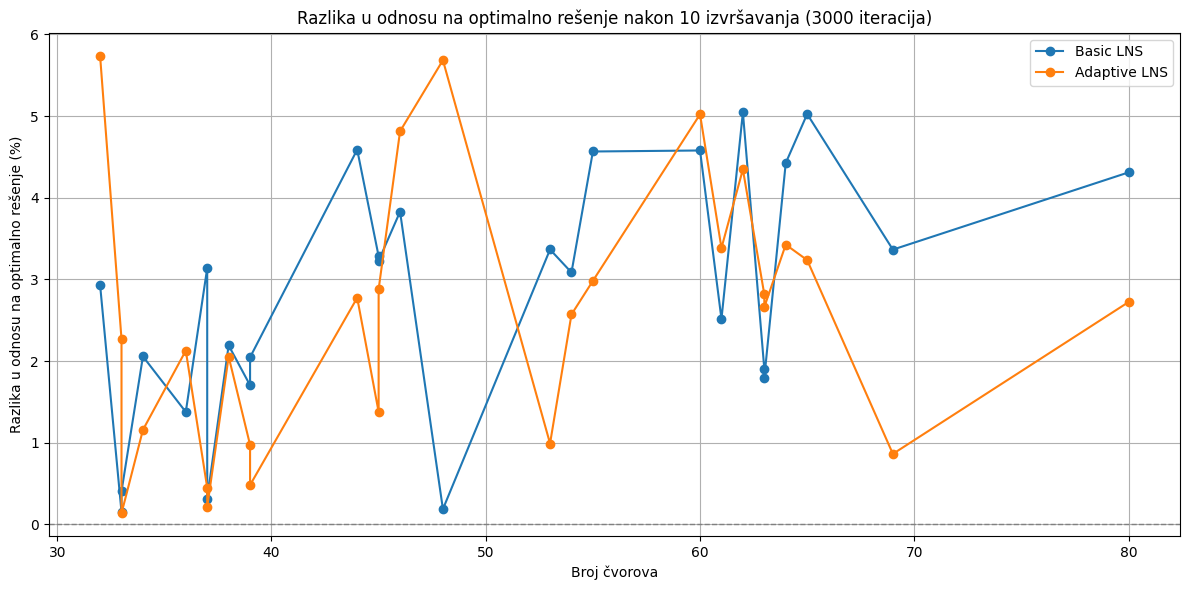

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(
    df["n_nodes"],
    df["basic_gap"],
    marker="o",
    label="Basic LNS"
)

plt.plot(
    df["n_nodes"],
    df["adaptive_gap"],
    marker="o",
    label="Adaptive LNS"
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)

plt.xlabel("Broj čvorova")
plt.ylabel("Razlika u odnosu na optimalno rešenje (%)")
plt.title("Razlika u odnosu na optimalno rešenje nakon 10 izvršavanja (3000 iteracija)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
SELECTED_INSTANCES = [
    "A-n32-k5.vrp",
    "A-n44-k6.vrp",
    "A-n60-k9.vrp",
    "A-n80-k10.vrp"
]


In [50]:
def run_with_history(problem, algorithm, **kwargs):
    best, history = problem.solve(
        algorithm=algorithm,
        return_history=True,
        **kwargs
    )
    return best, history


In [51]:
histories = {}

for inst in SELECTED_INSTANCES:
    print("Running:", inst)

    tsplib_problem = tsplib95.load(f"../../instances/Set A/examples/{inst}")
    parsed = parse_cvrp_problem(tsplib_problem)

    problem = CVRPProblem(
        parsed.nodes,
        parsed.demands,
        parsed.capacity,
        parsed.depot,
        filename=inst
    )

    # BASIC
    _, hist_basic = run_with_history(
        problem,
        algorithm=LNSMethod.BASIC,
        accept=SimulatedAnnealingAccept(),
        destroy_methods=[RandomDestroy()],
        repair_methods=[RegretRepair()],
        max_iterations=3000
    )

    # ADAPTIVE
    _, hist_adaptive = run_with_history(
        problem,
        algorithm=LNSMethod.ADAPTIVE,
        accept=SimulatedAnnealingAccept(),
        destroy_methods=[
            RandomDestroy(),
            WorstDestroy(),
            RelatedDestroy(),
            WorstRouteDestroy()
        ],
        repair_methods=[GreedyRepair(), RegretRepair()],
        max_iterations=3000
    )

    histories[inst] = {
        "basic": hist_basic,
        "adaptive": hist_adaptive
    }


Running: A-n32-k5.vrp
Running: A-n44-k6.vrp
Running: A-n60-k9.vrp
Running: A-n80-k10.vrp


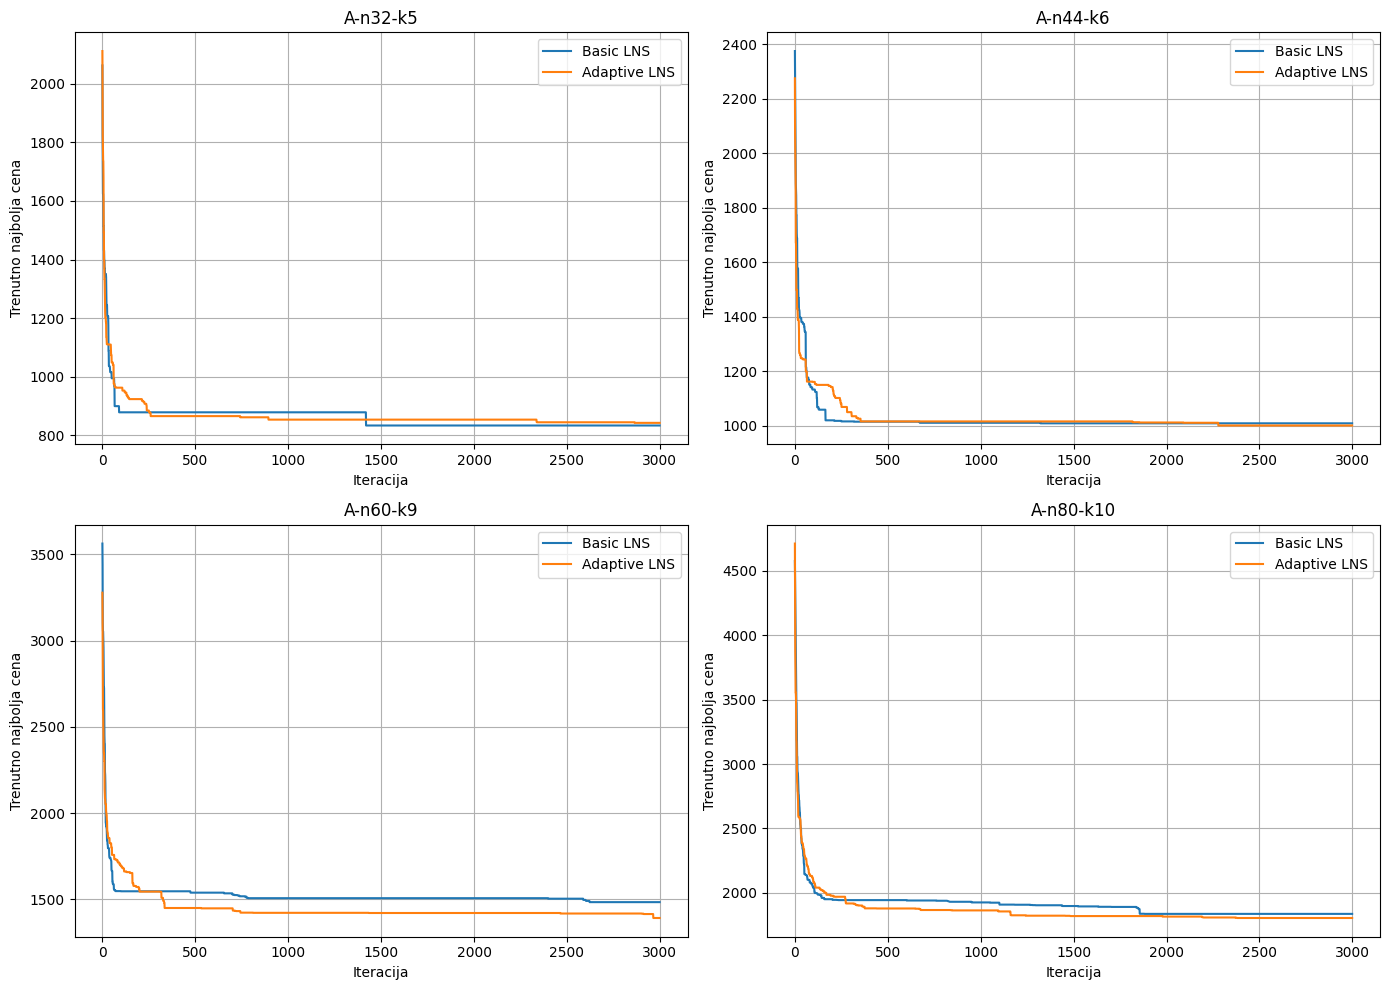

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, inst in zip(axes, SELECTED_INSTANCES):
    ax.plot(histories[inst]["basic"], label="Basic LNS")
    ax.plot(histories[inst]["adaptive"], label="Adaptive LNS")

    ax.set_title(inst.replace(".vrp", ""))
    ax.set_xlabel("Iteracija")
    ax.set_ylabel("Trenutno najbolja cena")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
